In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
from statsmodels.graphics.tsaplots import plot_pacf

In [142]:
df_parquet = pd.read_parquet('../data/combined_data/')
df_parquet.head()

,PULocationID,hourly_timestamp,pickup_hour_of_day,pickup_day_of_week,pickup_month,pickup_borough,num_trips,pickup_num_businesses
0,176,2022-03-01 00:00:00,0,3,3,Staten Island,4,2801
1,218,2022-03-01 01:00:00,1,3,3,Queens,7,2240
2,4,2022-03-01 02:00:00,2,3,3,Manhattan,33,3132
3,116,2022-03-01 02:00:00,2,3,3,Manhattan,28,8106
4,172,2022-03-01 02:00:00,2,3,3,Staten Island,2,5883


In [143]:
sf = gpd.read_file("../data/taxi_zones/taxi_zones.shp")
zones = pd.read_csv("../data/taxi_zones/taxi+_zone_lookup.csv")

sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

gdf = gpd.GeoDataFrame(pd.merge(zones, sf, on='LocationID', how='inner'))

geoJSON = gdf[['LocationID', 'geometry']].drop_duplicates('LocationID').to_json()

In [144]:
df_parquet = df_parquet.merge(gdf[['LocationID', 'geometry']], left_on='PULocationID', right_on='LocationID')

<Axes: xlabel='num_trips', ylabel='Count'>

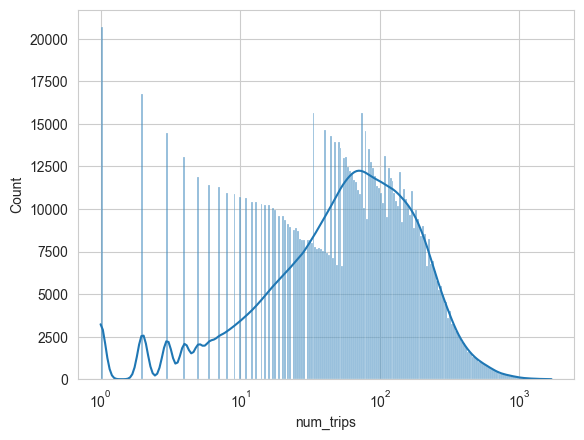

In [145]:
plt.xscale('log')
sns.histplot(df_parquet['num_trips'], kde=True)

<Axes: xlabel='pickup_hour_of_day', ylabel='num_trips'>

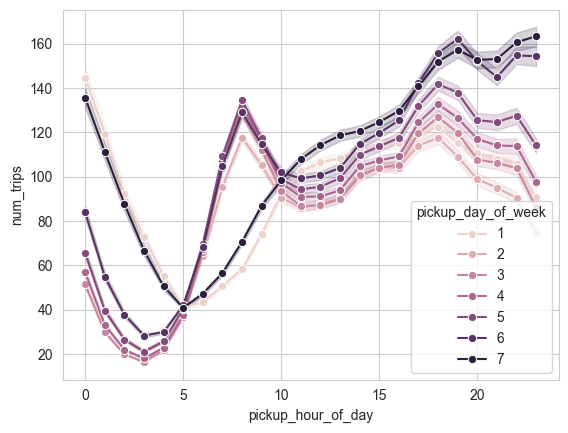

In [146]:
sns.lineplot(x='pickup_hour_of_day', y='num_trips', hue='pickup_day_of_week', data=df_parquet, marker='o')

In [147]:
# Bin the number of businesses
df_parquet['pickup_num_businesses_interval'] = pd.cut(df_parquet['pickup_num_businesses'], bins=range(1000,30000,3000))

In [148]:
df_parquet.head()

,PULocationID,hourly_timestamp,pickup_hour_of_day,pickup_day_of_week,pickup_month,pickup_borough,num_trips,pickup_num_businesses,LocationID,geometry,pickup_num_businesses_interval
0,176,2022-03-01 00:00:00,0,3,3,Staten Island,4,2801,176,"POLYGON ((-74.12187 40.57511, -74.12187 40.575...","(1000, 4000]"
1,218,2022-03-01 01:00:00,1,3,3,Queens,7,2240,218,"POLYGON ((-73.76562 40.67478, -73.7638 40.6737...","(1000, 4000]"
2,4,2022-03-01 02:00:00,2,3,3,Manhattan,33,3132,4,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...","(1000, 4000]"
3,116,2022-03-01 02:00:00,2,3,3,Manhattan,28,8106,116,"POLYGON ((-73.93925 40.8283, -73.93969 40.8276...","(7000, 10000]"
4,172,2022-03-01 02:00:00,2,3,3,Staten Island,2,5883,172,"POLYGON ((-74.08655 40.56963, -74.08691 40.568...","(4000, 7000]"


/Users/dakshagrawal/Documents/GitHub/project-1-individual-dakshAg-v2/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


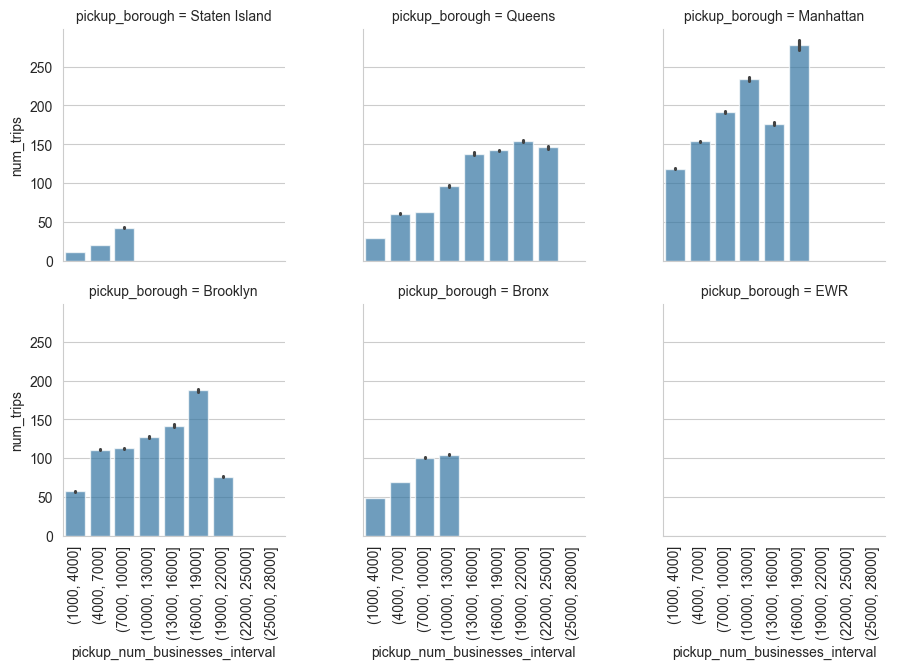

In [149]:
# Plot the number of trips vs the number of businesses for each borough
g = sns.FacetGrid(df_parquet, col="pickup_borough", col_wrap=3)
g.map(sns.barplot, "pickup_num_businesses_interval", "num_trips", alpha=.7)
g.tick_params(axis='x', rotation=90)
g.add_legend()

In [153]:
# Find the correlation between the number of businesses and the number of trips grouped by borough
df_parquet[['pickup_num_businesses', 'num_trips', 'pickup_borough']].groupby('pickup_borough').corr().unstack()['num_trips']['pickup_num_businesses']

pickup_borough
Bronx            0.600628
Brooklyn         0.374746
EWR                   NaN
Manhattan        0.421656
Queens           0.302720
Staten Island    0.489462
Name: pickup_num_businesses, dtype: float64

<Axes: xlabel='pickup_num_businesses', ylabel='num_trips'>

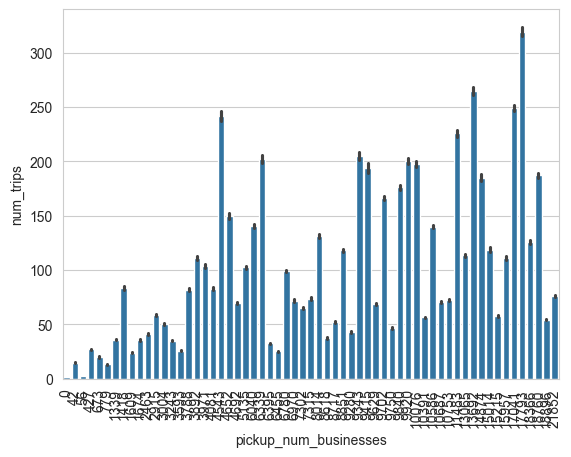

In [151]:
plt.xticks(rotation=90)
sns.barplot(x='pickup_num_businesses', y='num_trips', data=df_parquet[df_parquet['pickup_borough'] == "Brooklyn"])